<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/02_01_Artificial_Neural_Network(%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8)_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **02_01 Artificial_Neural Network(예측모델)**

## 1. 기본 Pakage 설정 및 데이터 불러오기

In [ ]:
##한글 폰트 인식

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,927 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [ ]:
## 1. 기본
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. 데이터 가져오기
import pandas as pd

## 3. 데이터 전처리
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder


## 4. 훈련/테스트용 데이터 분리
from sklearn.model_selection import train_test_split

## 5. 모델 구축
from sklearn.neural_network import MLPRegressor
##from sklearn.neural_network import MLPClassifier

## 6.모델 검정
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 7.최적화
from sklearn.model_selection import GridSearchCV


import warnings


In [ ]:
## 한글 인식

plt.rc("font", family="NanumBarunGothic")

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
train.head()

<ipython-input-26-92ce155de80b>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,TRAIN_000,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
1,TRAIN_001,1.42502,0.0,19.58,0.0,0.871,6.51,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
2,TRAIN_002,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
3,TRAIN_003,9.51363,0.0,18.1,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71,14.9
4,TRAIN_004,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       51 non-null     object 
 1   CRIM     51 non-null     float64
 2   ZN       51 non-null     float64
 3   INDUS    51 non-null     float64
 4   CHAS     51 non-null     float64
 5   NOX      51 non-null     float64
 6   RM       51 non-null     float64
 7   AGE      51 non-null     float64
 8   DIS      51 non-null     float64
 9   RAD      51 non-null     float64
 10  TAX      51 non-null     float64
 11  PTRATIO  51 non-null     float64
 12  B        51 non-null     float64
 13  LSTAT    51 non-null     float64
dtypes: float64(13), object(1)
memory usage: 5.7+ KB


In [ ]:
train.columns

Index(['ID', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## 데이터 전처리

### 3. 1. 필요없는 변수 제거

In [ ]:
train = train.drop('ID', axis=1)

### 3.2. 범주형 변수처리

In [ ]:
## train["주거환경"]

## 4. 데이터 탐색

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611349 entries, 0 to 611348
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       611348 non-null  object 
 1   CRIM     611349 non-null  float64
 2   ZN       611349 non-null  object 
 3   INDUS    611349 non-null  object 
 4   CHAS     611349 non-null  object 
 5   NOX      611349 non-null  object 
 6   RM       611349 non-null  object 
 7   AGE      611348 non-null  float64
 8   DIS      611348 non-null  float64
 9   RAD      611348 non-null  float64
 10  TAX      611348 non-null  object 
 11  PTRATIO  611348 non-null  float64
 12  B        611348 non-null  float64
 13  LSTAT    455 non-null     float64
 14  MEDV     455 non-null     float64
dtypes: float64(8), object(7)
memory usage: 70.0+ MB


### 4.0 데이터구조 살펴보기

In [ ]:
train.shape

(9075, 15)

### 4. 1. EDA데이터 탐색


In [ ]:
## 수치형 변수
train.describe().round(2)##뒤에.T붙이면 가로세로 바꿈

,CRIM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
count,9075.00,9073.00,9073.00,9073.00,9073.00,9073.00,455.00,455.00
mean,6614.90,80.65,1896.75,191410.43,9.86,66294.45,12.60,22.57
std,3868.74,28.94,435.09,43982.22,6.96,34302.52,7.09,9.12
min,0.01,2.90,1.13,1.00,1.00,0.32,1.73,5.00
25%,3830.00,59.92,1986.00,201603.00,4.00,43000.00,6.97,17.10
50%,7155.00,84.68,1997.00,201606.00,8.00,60500.00,11.28,21.20
75%,9824.00,84.98,2007.00,201608.00,14.00,89000.00,16.70,25.10
max,12637.00,265.75,2016.00,201612.00,44.00,228000.00,36.98,50.00


In [ ]:
## 범주형 변수
catergorical_features = ["ZN", "RM"]

for col in catergorical_features:
  cat = train[col].value_counts()
  print(cat)

서울특별시    8618
0.0       334
20.0       20
80.0       11
12.5       10
25.0       10
40.0        7
22.0        7
45.0        6
30.0        5
90.0        5
95.0        4
33.0        4
55.0        3
52.5        3
35.0        3
75.0        3
28.0        3
21.0        3
34.0        3
60.0        3
85.0        2
70.0        2
100.0       1
18.0        1
82.5        1
1980        1
17.5        1
서울특별        1
Name: ZN, dtype: int64
신천동 17 파크리오         550
잠실동 22 리센츠          382
잠실동 19 잠실엘스         348
문정동 150 훼밀리         245
잠실동 35 트리지움         223
                   ... 
5.998                 1
송파동 31-2 현대레이크빌1      1
6.442                 1
석촌동 227-12 밀란체        1
암사동 453-38 평대정원       1
Name: RM, Length: 973, dtype: int64


### 4.2. 그래프 그리기


# 수치형 변수


In [ ]:
g = sns.pairplot(train)

Error in callback <function _draw_all_if_interactive at 0x7fd9c0419120> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd9c04183a0> (for post_execute):


KeyboardInterrupt: 

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


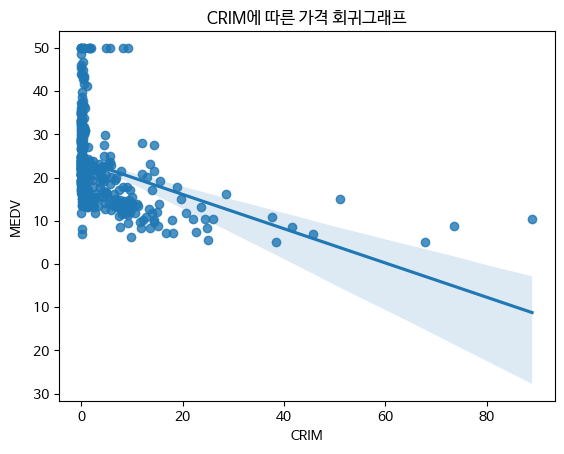

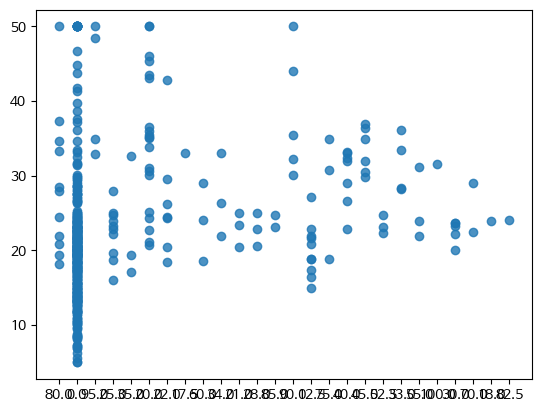

In [ ]:
# 변수별 선형회귀 그래프
numeric_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
for var in numeric_features:
  plt.figure()
  sns.regplot(x= var, y="MEDV", data=train).set(title=f"{var}에 따른 가격 회귀그래프")

In [ ]:
# 범주형 자료 그래프

categorical_features = ["", ""]

for col in categorical_features:
  sns.countplot(x=cil, data=train)
  plt.show()

##5. 훈련/테스트용 데이터 분할

### 5. 1. data(X), target(y)으로 분리

In [ ]:
## X값 추출
X = train.drop(["ID", "MEDV"], axis =1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,1.42502,0.0,19.58,0.0,0.871,6.51,100.0,1.7659,5.0,403.0,14.7,364.31,7.39
2,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
3,9.51363,0.0,18.1,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71
4,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10


In [ ]:
y = train["MEDV"]
y.head()

0    21.9
1    23.3
2    32.9
3    14.9
4    21.5
Name: MEDV, dtype: float64

In [ ]:
# y값 표준화
import numpy as np

y = StandardScaler().fit_transform(y.to_numpy().reshape(-1, 1)).flatten()
y

array([-0.07405831,  0.07960665,  1.13330924, ...,         nan,
               nan,         nan])

### 5.2. 훈련/테스트용으로 분리

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. pipeline으로 전처리

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 6. 1.preprocessing

In [ ]:
## pipeline세팅
## 수치형 자료(표준화)
numeric_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

numeric_transformer = Pipeline(
    steps  = [
        ("imputer", SimpleImputer(strategy="mean")), #누락된 값 평균처리
        ("scaler", StandardScaler()) #
    ]
)

## 범주형 변수(원핫인코딩)
catergorical_features = []

catergorical_transformer = Pipeline(
    steps  = [
        ("imputer", SimpleImputer(strategy="constant",
                                  fill_value = "missing")), #누락된 값 상수처리
        ("scaler", OneHotEncoder(handle_unknown = "ignore"))
        ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", catergorical_transformer, catergorical_features)
        ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                  'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-11-aee7b800aa31>, line 15)

### 6. 2. 데이터 전처리 결과 확인

In [ ]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '부산광역시'

##7.모델만들기(모델 설정)


### 7. 1. pipieline으로 모델 연결


In [ ]:
from sklearn import linear_model

from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline(
    steps =[
        ("numeric_transformer", numeric_transformer),
        ("lr_reg", Lasso())
    ]
)

lr_pipe

Pipeline(steps=[('numeric_transformer',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('lr_reg', Lasso())])

### 7.2. 하이퍼파라미터 세팅

In [ ]:
lr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'numeric_transformer', 'lr_reg', 'numeric_transformer__memory', 'numeric_transformer__steps', 'numeric_transformer__verbose', 'numeric_transformer__imputer', 'numeric_transformer__scaler', 'numeric_transformer__imputer__add_indicator', 'numeric_transformer__imputer__copy', 'numeric_transformer__imputer__fill_value', 'numeric_transformer__imputer__keep_empty_features', 'numeric_transformer__imputer__missing_values', 'numeric_transformer__imputer__strategy', 'numeric_transformer__imputer__verbose', 'numeric_transformer__scaler__copy', 'numeric_transformer__scaler__with_mean', 'numeric_transformer__scaler__with_std', 'lr_reg__alpha', 'lr_reg__copy_X', 'lr_reg__fit_intercept', 'lr_reg__max_iter', 'lr_reg__positive', 'lr_reg__precompute', 'lr_reg__random_state', 'lr_reg__selection', 'lr_reg__tol', 'lr_reg__warm_start'])

In [ ]:
lr_grid = {
            "lr_reg__alpha": np.logspace(-6, 0, 7),
            "lr_reg__tol": np.logspace(-6, 0, 7)
}

lr_grid

{'lr_reg__alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
 'lr_reg__tol': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])}

### 7.3. 하이퍼파라미터 그리드 세팅

In [ ]:
lr_gs = GridSearchCV(estimator=lr_pipe,
                     param_grid=lr_grid,
                     scoring="r2",
                     cv = 10,
                     n_jobs=-1,
                     verbose=10,
                     return_train_score= True)


## 8. 모델 훈련(모델 학습)

### 8.1. 모델 훈련

In [ ]:
lr_gs.fit(train_x, train_y)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('numeric_transformer',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer()),
                                                        ('scaler',
                                                         StandardScaler())])),
                                       ('lr_reg', Lasso())]),
             n_jobs=-1,
             param_grid={'lr_reg__alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'lr_reg__tol': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True, scoring='r2', verbose=10)

### 8.2 검증곡선으로 튜닝 결과 확인

In [ ]:
lr_gs.cv_results_

{'mean_fit_time': array([0.01759088, 0.0186285 , 0.01581624, 0.01286533, 0.01374829,
        0.01446314, 0.01495895, 0.01457062, 0.01257186, 0.01574218,
        0.01736469, 0.00785227, 0.00832639, 0.00828745, 0.00787935,
        0.00878122, 0.00891883, 0.01126556, 0.00900044, 0.00793629,
        0.00736938, 0.00861423, 0.00802183, 0.00835812, 0.00888062,
        0.00925207, 0.01103485, 0.00761752, 0.00828211, 0.01063054,
        0.00741978, 0.00800097, 0.00733097, 0.00780365, 0.00868893,
        0.00774422, 0.00772595, 0.00779414, 0.00761073, 0.00796397,
        0.00760612, 0.00858202, 0.01118941, 0.00755403, 0.00749135,
        0.00784426, 0.00736444, 0.00796382, 0.00791404]),
 'std_fit_time': array([0.00226264, 0.00465725, 0.00811987, 0.00614315, 0.00579167,
        0.00583119, 0.00271196, 0.00651472, 0.00499554, 0.0039146 ,
        0.00569066, 0.00058633, 0.00232128, 0.00221861, 0.00028007,
        0.00279873, 0.00177472, 0.00421485, 0.00221419, 0.00090356,
        0.0002917 , 0.002

In [ ]:
##분석 결과를 표로 정리

results_df = pd.DataFrame(lr_gs.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
19,"{'lr_reg__alpha': 0.0001, 'lr_reg__tol': 0.1}",1,0.666499,0.117108
16,"{'lr_reg__alpha': 0.0001, 'lr_reg__tol': 0.0001}",2,0.666319,0.117265
14,"{'lr_reg__alpha': 0.0001, 'lr_reg__tol': 1e-06}",3,0.666319,0.117265
15,"{'lr_reg__alpha': 0.0001, 'lr_reg__tol': 1e-05}",4,0.666319,0.117265
17,"{'lr_reg__alpha': 0.0001, 'lr_reg__tol': 0.001}",5,0.666317,0.117264
11,"{'lr_reg__alpha': 1e-05, 'lr_reg__tol': 0.01}",6,0.666316,0.117159
7,"{'lr_reg__alpha': 1e-05, 'lr_reg__tol': 1e-06}",7,0.666316,0.117159
8,"{'lr_reg__alpha': 1e-05, 'lr_reg__tol': 1e-05}",8,0.666316,0.117159
9,"{'lr_reg__alpha': 1e-05, 'lr_reg__tol': 0.0001}",9,0.666316,0.117159
10,"{'lr_reg__alpha': 1e-05, 'lr_reg__tol': 0.001}",10,0.666316,0.117160


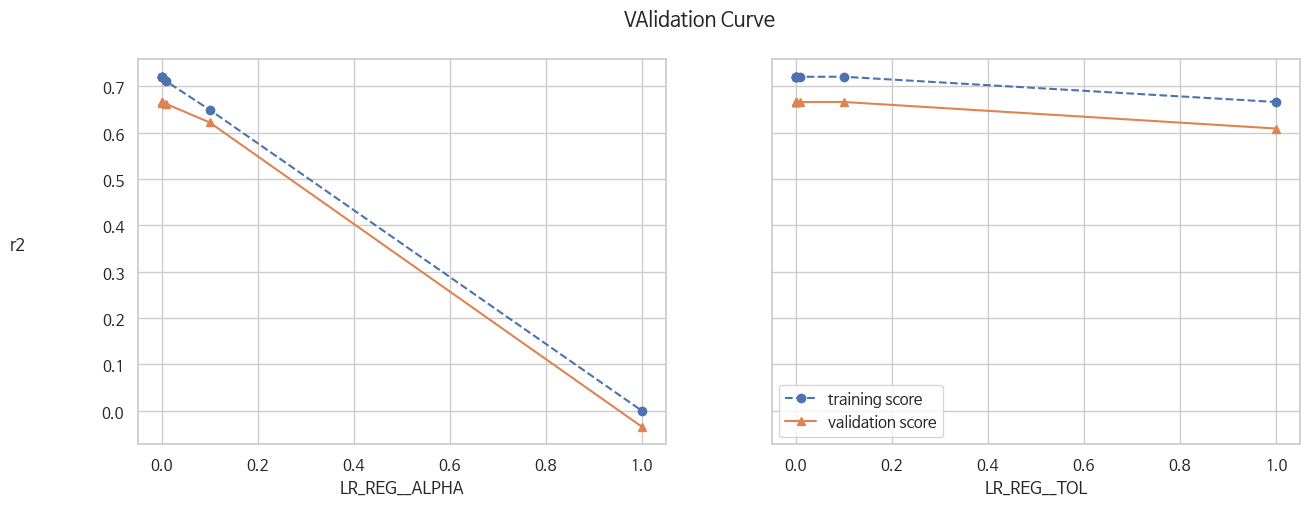

In [ ]:
## 튜닝결과 그래프 그리기
## 한글 인식

plt.rc("font", family="NanumBarunGothic")

results = lr_gs.cv_results_
mean_train = results["mean_train_score"]
mean_test = results["mean_test_score"]

masks = []
masks_names = list(lr_gs.best_params_.keys())
masks_names

for p_k, p_v in lr_gs.best_params_.items():
    masks.append(list(results["param_"+p_k].data==p_v))

masks

params = lr_gs.param_grid

fig, ax = plt.subplots(1, len(params),
                      sharex ="none",
                      sharey = "all",
                      figsize= (15, 5))
fig.suptitle("VAlidation Curve")
fig.text(0.04, 0.5, "r2")

for i, p in enumerate(masks_names):
    m = np.stack(masks[:i]+masks[i+1:])
    best_params_mask = m.all(axis=0)
    best_index = np.where(best_params_mask)
    x = np.array(params[p])
    y_1 = np.array(mean_train[best_index])
    y_2 = np.array(mean_test[best_index])
    ax[i].errorbar(x, y_1, linestyle="--", marker="o", label = "training score")
    ax[i].errorbar(x, y_2, linestyle="-", marker="^", label = "validation score")
    ax[i].set_xlabel(p.upper())

plt.legend()
plt.show()

### 8.3 베스트 모델 설정

In [ ]:
# 베스트 모델 파라미터 확인

print(lr_gs.best_score_)

print(lr_gs.best_params_)

0.6664988845124878
{'lr_reg__alpha': 0.0001, 'lr_reg__tol': 0.1}


In [ ]:
best_reg = lr_gs.best_estimator_
best_reg.fit(train_x, train_y)

Pipeline(steps=[('numeric_transformer',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('lr_reg', Lasso(alpha=0.0001, tol=0.1))])

###8.4. 중요변수 확인

In [ ]:
best_reg["lr_reg"].coef_

array([-0.11249238,  0.11432494,  0.05824545,  0.06381041, -0.25378616,
        0.25258747,  0.0557614 , -0.28290908,  0.27576984, -0.1944078 ,
       -0.22858148,  0.06922165, -0.44741081])

In [ ]:
# 중요도 점수
features = best_reg["numeric_transformer"].get_feature_names_out()
importances = best_reg["lr_reg"].coef_
importanes = importances.flatten()
output = pd.DataFrame([features, importances],
                      index = ["features", "importances"]).T
output = output.sort_values(["importances"], ascending=False)
output

,features,importances
8,RAD,0.27577
5,RM,0.252587
1,ZN,0.114325
11,B,0.069222
3,CHAS,0.06381
2,INDUS,0.058245
6,AGE,0.055761
0,CRIM,-0.112492
9,TAX,-0.194408
10,PTRATIO,-0.228581


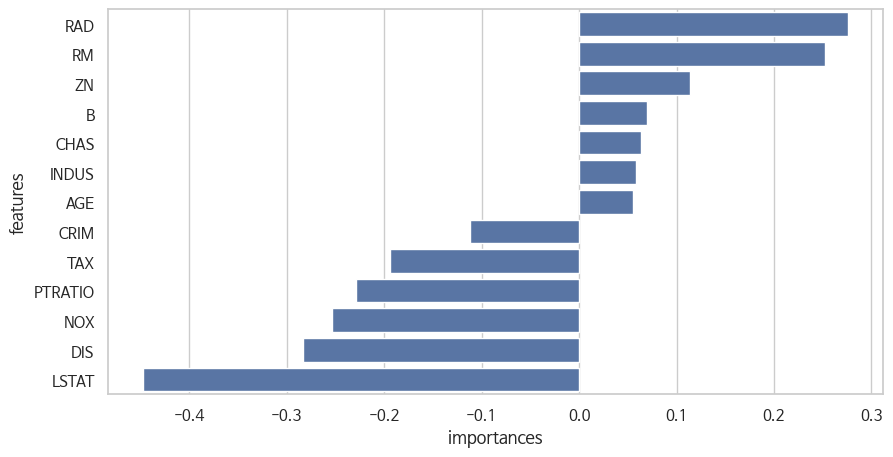

In [ ]:
##그래프 출력
plt.rc("font", family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(10,5))
sns.set(style="whitegrid")
ax = sns.barplot( y= "features", x="importances", data=output)
plt.show()

## 9. 모델 test 및 검정

### 9. 1. 검증용데이터 예측

In [ ]:
#### 검증데이터 예측

y_pred = best_reg.predict(val_x)
y_pred


array([-6.31523637e-01,  1.04501462e-01,  6.46558902e-01,  1.30123966e+00,
        1.88824588e+00,  1.03404519e+00,  9.13705239e-01, -5.32665573e-01,
        2.52332844e-01,  1.81262859e+00, -1.57052836e+00, -8.12600888e-01,
        1.01361901e+00, -8.91983316e-01, -8.56683075e-01,  8.55337880e-01,
       -5.68689404e-01, -1.59539077e+00, -4.13691104e-01,  1.23681831e+00,
       -6.86063892e-01, -7.45721712e-01,  1.36216214e+00, -1.15323818e+00,
       -1.91328795e-02,  2.57618554e-04, -7.42788365e-01, -6.44936675e-01,
       -4.61328902e-01,  5.63305959e-01, -4.95298922e-02, -7.23456472e-01,
       -5.80412292e-01, -5.15852597e-01,  5.36865461e-01, -6.85033705e-02,
       -6.04966833e-01, -6.17557587e-02, -5.42098121e-01,  8.54176261e-02,
       -9.98085794e-02, -2.25740036e-02,  8.44916522e-01, -4.82190671e-01,
       -1.50981276e+00, -8.25664054e-01,  2.25392446e+00, -8.52232268e-01,
        1.58220919e+00, -5.86432775e-01, -2.53217520e-01, -3.22311568e-01,
       -7.02320604e-01, -

### 9. 2. 실제값과 예측값 비교확인

In [ ]:
output=pd.DataFrame({"Actual":val_y.squeeze(), "Predicted":y_pred.squeeze()})

output

,Actual,Predicted
0,-1.193617,-0.631524
1,-0.348460,0.104501
2,0.672314,0.646559
3,3.010217,1.301240
4,3.010217,1.888246
...,...,...
86,0.189367,-0.217842
87,2.571174,1.832966
88,-0.150891,0.072162
89,-0.216747,0.533122


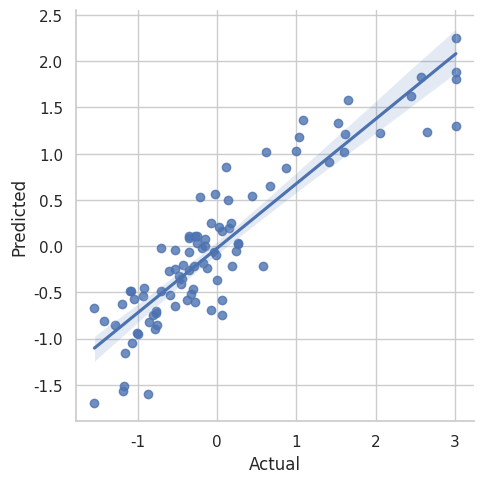

In [ ]:
sns.lmplot(x="Actual", y="Predicted", data=output)

### 9.3 모델 검정

In [ ]:
print("MSE: %0.3f" % mean_squared_error(val_y, y_pred))
print("MAE: %0.3f" % mean_absolute_error(val_y, y_pred))
print("RMSE: %0.3f" % np.sqrt(mean_squared_error(val_y, y_pred)))
print("R2: %0.3f" % r2_score(val_y, y_pred))

MSE: 0.237
MAE: 0.361
RMSE: 0.486
R2: 0.803
